<a href="https://colab.research.google.com/github/josebravogarcia/DeepLearning/blob/main/tutorials/importar_labeling_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import IPython.display as display
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
import skimage.io as io
import os


!pip install -q pycocotools
from pycocotools.coco import COCO

!git clone https://github.com/josebravogarcia/DeepLearning
%cd DeepLearning/tutorials
!ls

fatal: destination path 'DeepLearning' already exists and is not an empty directory.
/content/DeepLearning/tutorials
'190917_201514_0000000003_&icapbk[000].bmp'
'190917_201537_0000000004_&icapbk[000].bmp'
'190917_201558_0000000005_&icapbk[000].bmp'
'190917_201618_0000000006_&icapbk[000].bmp'
'190917_201639_0000000007_&icapbk[000].bmp'
'190917_201703_0000000008_&icapbk[000].bmp'
'190917_201723_0000000009_&icapbk[000].bmp'
'190917_201743_0000000010_&icapbk[000].bmp'
'190917_201804_0000000011_&icapbk[000].bmp'
'190917_201829_0000000012_&icapbk[000].bmp'
'190917_201848_0000000013_&icapbk[000].bmp'
'190917_201907_0000000014_&icapbk[000].bmp'
'190917_201927_0000000015_&icapbk[000].bmp'
'190917_201948_0000000016_&icapbk[000].bmp'
'190917_202008_0000000017_&icapbk[000].bmp'
'190917_202026_0000000018_&icapbk[000].bmp'
'190917_202045_0000000019_&icapbk[000].bmp'
'190917_202105_0000000020_&icapbk[000].bmp'
'190917_202124_0000000021_&icapbk[000].bmp'
'190917_202424_0000000022_&icapbk[000].bmp'
'19

In [92]:
img_dir=('.')
annotations_file='coco2.json'

#Loading object detection annotations of 2017 validation set using COCO API
coco=COCO(annotations_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [93]:
#validation set details
imgIds = coco.getImgIds()
print("Total images: {}".format(len(imgIds)))
rand=np.random.randint(0,len(imgIds))
img = coco.loadImgs(imgIds[rand])[0]
print("Image example:")
print(img)
annIds=coco.getAnnIds()
print("\nTotal annotations: {}".format(len(annIds)))
print(annIds)

gt_ann_ids = coco.getAnnIds(imgIds=[rand])
gt_anns = coco.loadAnns(gt_ann_ids)

print("Annotation example:")
print(gt_anns)

Total images: 140
Image example:
{'id': 71, 'width': 1600, 'height': 1200, 'file_name': '201016_185549_0000000716_&icapbk[000].bmp', 'license': None, 'flickr_url': '', 'coco_url': None, 'date_captured': '2021-11-21T11:38:12Z'}

Total annotations: 61
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
Annotation example:
[]


In [39]:
cats = coco.loadCats(coco.getCatIds())
print("Number of categories: {}".format(len(cats)))
nms=[cat['name'] for cat in cats]
print('\nCOCO categories: \n{}\n'.format(' '.join(nms)))

Number of categories: 1

COCO categories: 
defect



In [94]:
def load_image_mask(img_id):
  img_descriptor = coco.loadImgs(img_id)
  file_name = img_descriptor[0]['file_name']

  #img, mask = None

  if os.path.exists(file_name):
    img = io.imread(file_name)
    h, w = img.shape
    mask_all = np.zeros((h, w), dtype=np.uint8)

    gt_ann_ids = coco.getAnnIds(imgIds=[img_id])
    gt_anns = coco.loadAnns(gt_ann_ids)
  
    mask = mask_all 
    for i in range(0,len(gt_anns)):
      mask += coco.annToMask(gt_anns[i])
  
    return img, mask
  
  else:
    return None, None



def plot_image_mask(img_id):

  gt_ann_ids = coco.getAnnIds(imgIds=[img_id])
  gt_anns = coco.loadAnns(gt_ann_ids)

  x_img, y_img = load_image_mask(img_id)
  
  plt.subplot(1, 3, 1)
  plt.imshow(x_img, cmap='gray')
  plt.title('Original image')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(y_img, cmap='gray')
  plt.title('Prediction')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(x_img, cmap='gray')
  coco.showAnns(gt_anns, draw_bbox= False)

  plt.show()

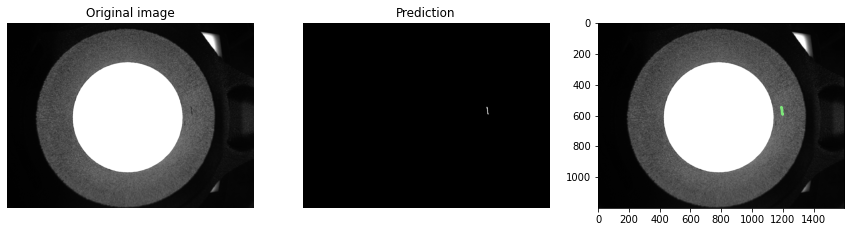

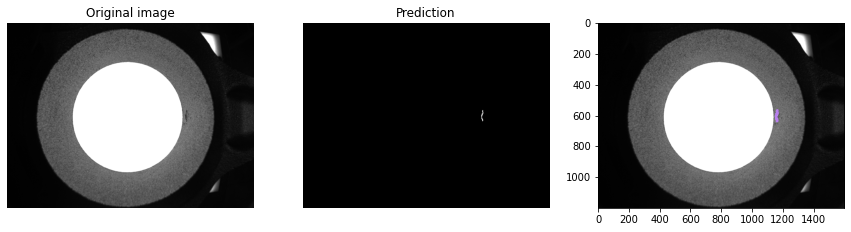

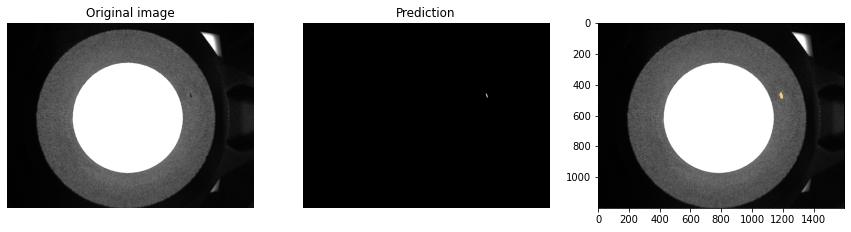

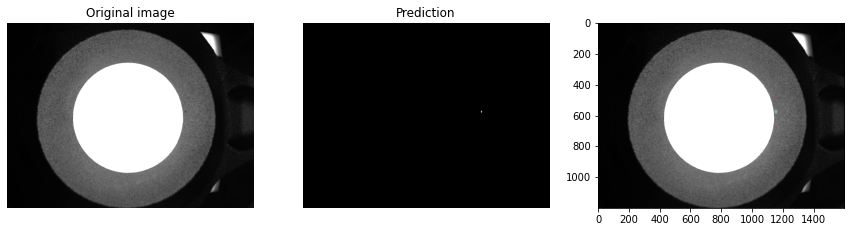

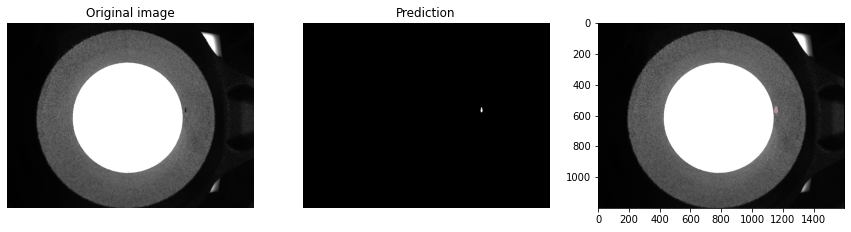

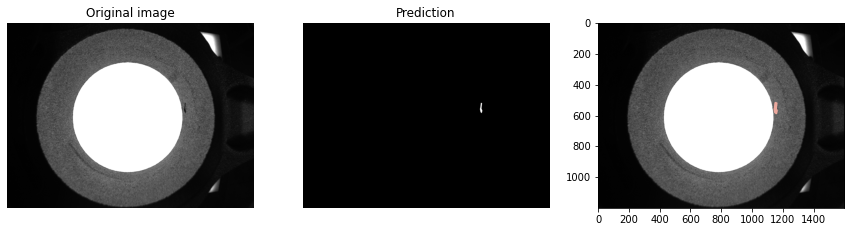

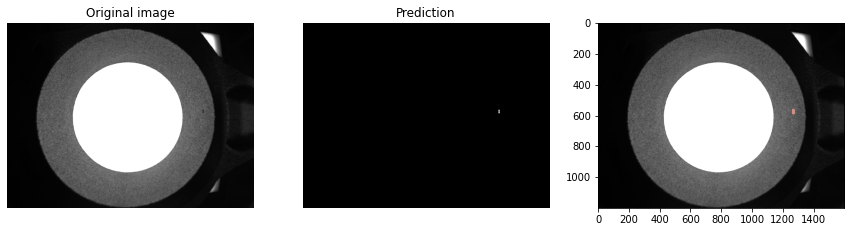

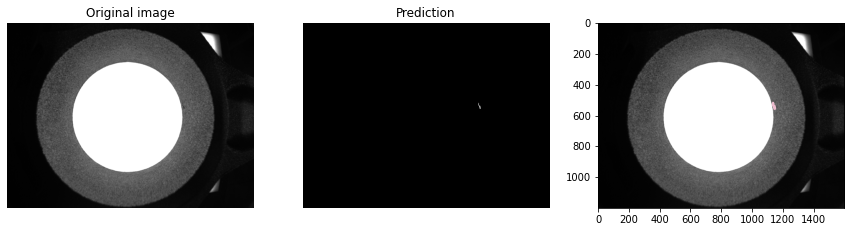

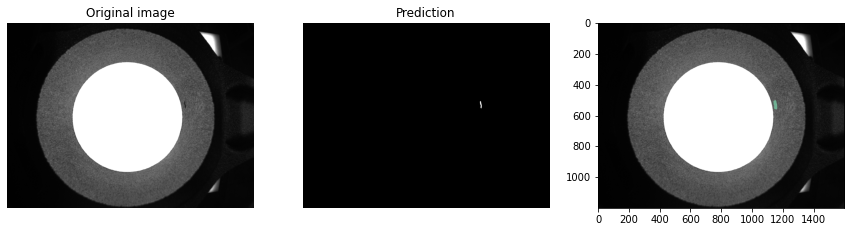

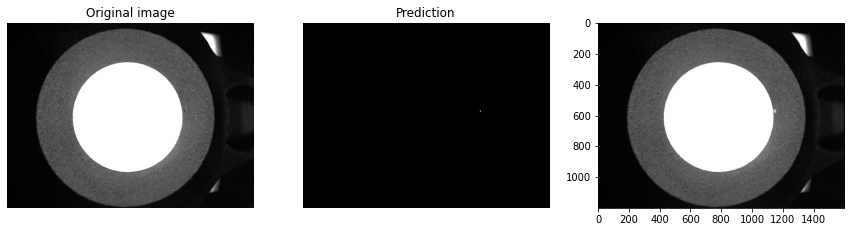

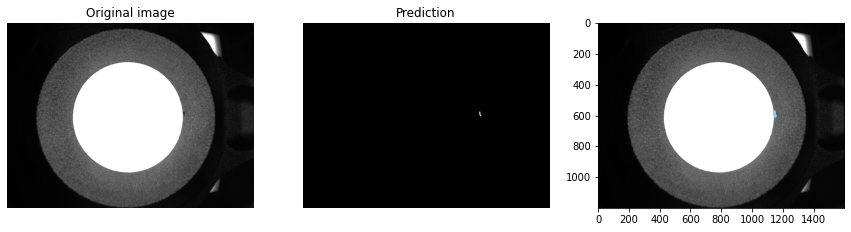

In [95]:
imgIds = coco.getImgIds()
j = 0

for i in imgIds:
  plt.figure(figsize=(15, 15))
  plot_image_mask(i)
  j += 1
  if j>10:
    break

In [96]:
import cv2
from pycocotools.coco import COCO

def load_images_masks(imgIds, resize=(512, 512)):

    IMAGE_CHANNELS = 1
    image_num = len(imgIds)
    
    images_all = [] #np.empty([image_num, resize[0], resize[1], IMAGE_CHANNELS])
    labels_all = [] #np.empty([image_num, resize[0], resize[1], IMAGE_CHANNELS])
     

    for image_index in imgIds:

        image, mask = load_image_mask(image_index)
        #print(type(image))
        if (type(image) is np.ndarray):
          if resize:
            image = cv2.resize(image, (resize[0], resize[1]))
            mask = cv2.resize(mask, (resize[0], resize[1]))

          #images_all[image_index] = np.reshape(image, (resize[0], resize[1], IMAGE_CHANNELS))
          #labels_all[image_index] = np.reshape(mask, (resize[0], resize[1], IMAGE_CHANNELS))
          images_all.append(np.reshape(image, (resize[0], resize[1], IMAGE_CHANNELS)))
          labels_all.append(np.reshape(mask, (resize[0], resize[1], IMAGE_CHANNELS)))


    return images_all, labels_all


In [97]:
import sklearn
from sklearn.model_selection import train_test_split

imgIds = coco.getImgIds()
X, Y = load_images_masks(imgIds)

X = np.array(X)
Y = np.array(Y)

print(X.shape)
print(Y.shape)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

print("train")
print(X_train.shape)
print(Y_train.shape)

print("test")
print(X_test.shape)
print(Y_test.shape)


(44, 512, 512, 1)
(44, 512, 512, 1)
train
(39, 512, 512, 1)
(39, 512, 512, 1)
test
(5, 512, 512, 1)
(5, 512, 512, 1)


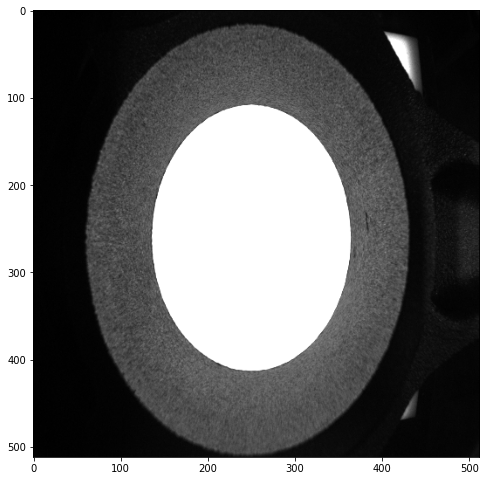

In [26]:
plt.imshow(X[0,:,:,0], cmap='gray')

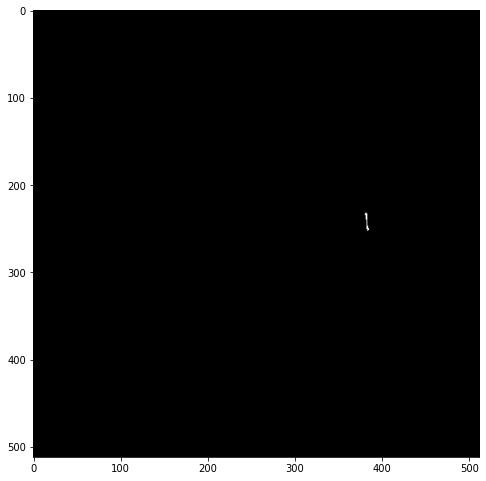

In [27]:

plt.imshow(Y[0,:,:,0], cmap='gray')

In [28]:
print(type(X_train))
print(type(Y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [125]:
img_rows = 512
img_cols = 512

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, UpSampling1D, Lambda, Conv2DTranspose, concatenate, Dropout, Flatten, Dense, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as K
from scipy.ndimage.measurements import label
import time

# Defining a small Unet
# Smaller Unet defined so it fits in memory 
def get_small_unet(start_neurons):
    inputs = Input((img_rows, img_cols, 1))
    inputs_norm = Lambda(lambda x: x/127.5 - 1.)

    conv1 = Conv2D(start_neurons * 1, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = Dropout(0.2)(pool1)

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = Dropout(0.2)(pool2)

    conv3 = Conv2D(start_neurons * 4, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    pool3 = Dropout(0.2)(pool3)
    
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    pool4 = Dropout(0.2)(pool4)

    conv5 = Conv2D(start_neurons * 16, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(start_neurons * 16, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(64, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    up6 = Dropout(0.2)(up6)
    conv6 = Conv2D(start_neurons * 8, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(start_neurons * 8, (3, 3), activation='relu', padding='same')(conv6)
    
    up7 = concatenate([Conv2DTranspose(32, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    up7 = Dropout(0.2)(up7)
    conv7 = Conv2D(start_neurons * 4, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(start_neurons * 4, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(16, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    up8 = Dropout(0.2)(up8)
    conv8 = Conv2D(start_neurons * 2, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(start_neurons * 2, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(8, kernel_size=(2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    up9 = Dropout(0.2)(up9)
    conv9 = Conv2D(start_neurons * 1, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(start_neurons * 1, (3, 3), activation='relu', padding='same')(conv9)
    
    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)
    

    dense = Flatten()(conv10)
    dense = Dense(units=256, activation='relu')(dense)
    conv11 = Reshape((16, 16, 1))(dense)

    conv11 = UpSampling2D(size =(2,2))(conv11)
    conv11 = Conv2D(2, (3, 3), activation='relu', padding='same')(conv11)
    
    conv11 = UpSampling2D(size =(4,4))(conv11)
    conv11 = Conv2D(2, (3, 3), activation='relu', padding='same')(conv11)

    conv11 = UpSampling2D(size =(4,4))(conv11)
    conv11 = Conv2D(2, (3, 3), activation='relu', padding='same')(conv11)

    conv11 = Conv2D(1, (1, 1), activation='sigmoid')(conv11)

    #conv11 = Conv2DTranspose(32, kernel_size=(2, 2), strides=(2, 2), padding='same')(dense)
    #conv11 = UpSampling2D(size =(16,16))(dense)

    #conv11 = Conv2D(1, (1, 1), activation='sigmoid')(conv11)
    print(conv11.shape.dims) 

    model = Model(inputs=inputs, outputs=conv10)

    return model 



def smooth_dice_coeff(smooth=1.):
    smooth = float(smooth)
    # IOU or dice coeff calculation
    def IOU_calc(y_true, y_pred):
            y_true_f = K.flatten(y_true)
            y_pred_f = K.flatten(y_pred)
            intersection = K.sum(float(y_true_f) * float(y_pred_f))

            return 2*(intersection + smooth) / (float(K.sum(y_true_f)) + float(K.sum(y_pred_f)) + smooth - intersection)

    def IOU_calc_loss(y_true, y_pred):
        return -IOU_calc(y_true, y_pred)
    return IOU_calc, IOU_calc_loss



model = get_small_unet(16)
IOU_calc, IOU_calc_loss = smooth_dice_coeff(0.00001)
model.compile(optimizer=Adam(learning_rate=1e-4), loss=IOU_calc_loss, metrics=[IOU_calc])

[Dimension(None), Dimension(512), Dimension(512), Dimension(1)]


In [126]:
history = model.fit(X_train, Y_train, batch_size=5, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
7/7 [==============================] - 146s 21s/step - loss: -8.0753e-04 - IOU_calc: 8.0698e-04 - val_loss: -3.7659e-04 - val_IOU_calc: 3.7659e-04
Epoch 2/10
7/7 [==============================] - 144s 21s/step - loss: -0.0011 - IOU_calc: 0.0011 - val_loss: -4.0528e-04 - val_IOU_calc: 4.0528e-04
Epoch 3/10
7/7 [==============================] - 143s 21s/step - loss: -0.0014 - IOU_calc: 0.0014 - val_loss: -6.7738e-04 - val_IOU_calc: 6.7738e-04
Epoch 4/10
7/7 [==============================] - 144s 21s/step - loss: -0.0017 - IOU_calc: 0.0017 - val_loss: -7.2762e-04 - val_IOU_calc: 7.2762e-04
Epoch 5/10
7/7 [==============================] - 144s 21s/step - loss: -0.0019 - IOU_calc: 0.0019 - val_loss: -8.7228e-04 - val_IOU_calc: 8.7228e-04
Epoch 6/10
7/7 [==============================] - 144s 21s/step - loss: -0.0021 - IOU_calc: 0.0021 - val_loss: -9.3351e-04 - val_IOU_calc: 9.3351e-04
Epoch 7/10
7/7 [==============================] - 144s 21s/step - loss: -0.0024 - IOU_calc: 

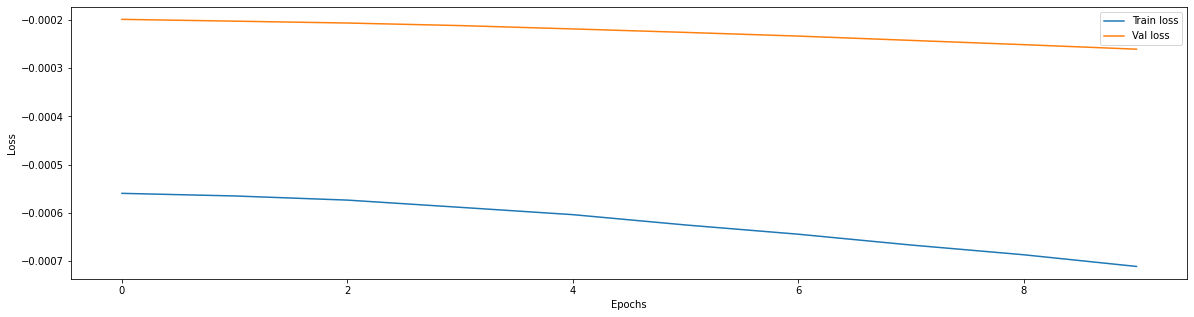

In [119]:
plt.figure(figsize=(20, 5)) 
plt.plot(model.history.history['loss'], label='Train loss')
plt.plot(model.history.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

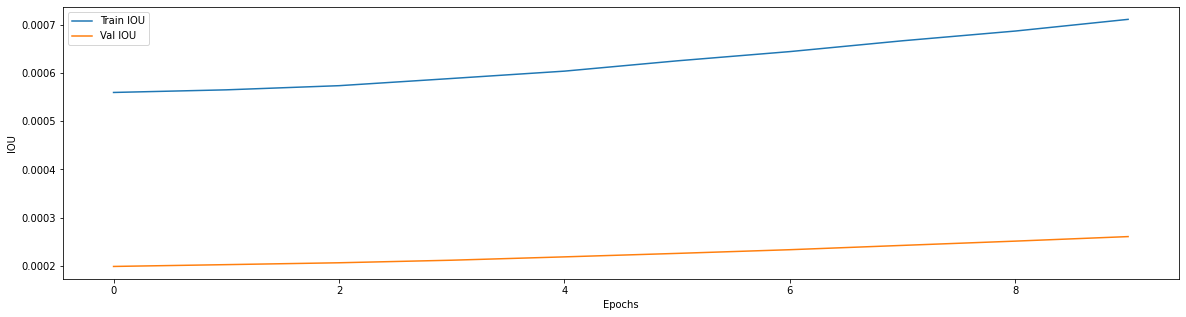

In [120]:
plt.figure(figsize=(20, 5))
plt.plot(model.history.history['IOU_calc'], label='Train IOU')
plt.plot(model.history.history['val_IOU_calc'], label='Val IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()

In [121]:

def predict_evaluation(pred, image, label):
    # transform gray image to rgb
    img = np.array(image, np.uint8)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    # scale pred and mask's pixel range to 0~255
    im_label = np.array(255*label, dtype=np.uint8)
    im_pred = np.array(255*pred, dtype=np.uint8)

    # transform both of them to rgb
    rgb_label = cv2.cvtColor(im_label, cv2.COLOR_GRAY2RGB)
    rgb_pred = cv2.cvtColor(im_pred, cv2.COLOR_GRAY2RGB)

    rgb_label[:, :, 1:3] = 0*rgb_label[:, :, 1:2]
    rgb_pred[:, :, 0] = 0*rgb_pred[:, :, 0]
    rgb_pred[:, :, 2] = 0*rgb_pred[:, :, 2]

    img_pred = cv2.addWeighted(rgb_img, 1, rgb_pred, 0.8, 0)
    img_label = cv2.addWeighted(rgb_img, 1, rgb_label, 0.8, 0)

    plt.figure(figsize=(25, 25))

    plt.subplot(1, 3, 1)
    plt.imshow(rgb_img)
    plt.title('Original image')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(img_pred)
    plt.title('Prediction')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(img_label)
    plt.title('Ground truth')
    plt.axis('off')

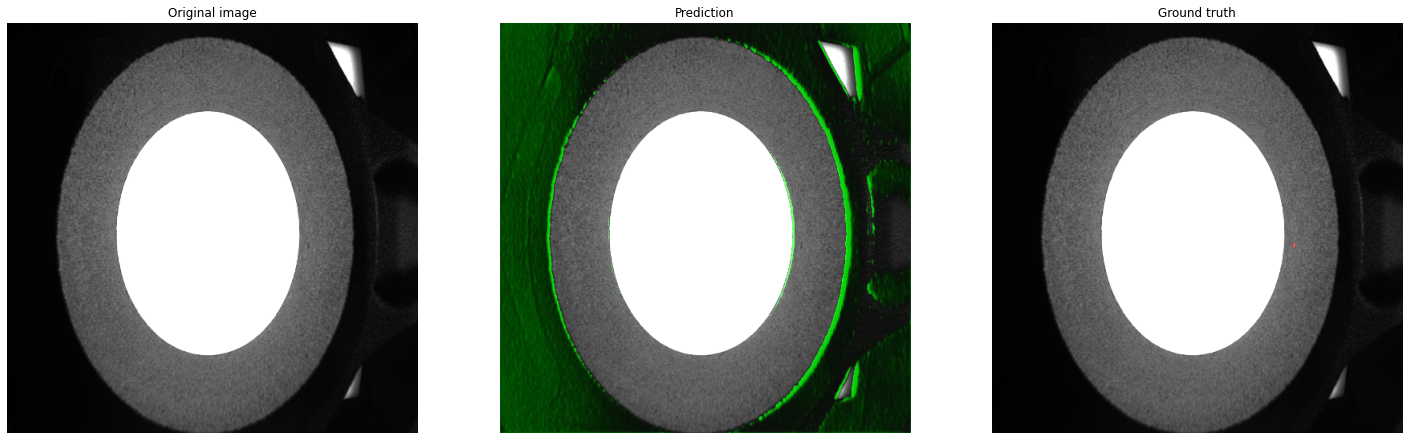

In [133]:
predict = model.predict(X_test)
i= 3
#for i in range(1,4):
predict_evaluation(predict[i,:,:,0], X_test[i,:,:,0], Y_test[i,:,:,0])